In [126]:
import pandas as pd

df_final = pd.read_csv("StudentPerformanceFactors.csv", sep=',', decimal=',')
df_final.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [127]:
# Predprocesiranje
print(df_final.isnull().sum())

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64


In [128]:
# Vrednost nadomestimo z 'Medium' kjer edino ima smisla
df_final['Teacher_Quality'] = df_final['Teacher_Quality'].fillna('Medium')

In [129]:
# Vrednost nadomestimo z moderate kjer je srednja vrednost
df_final['Distance_from_Home'] = df_final['Distance_from_Home'].fillna('Moderate')

In [130]:
# Parental education level ki nimamo dropamo kjer ne moremo ustrezno nadopolnit podatke.
df_final = df_final.dropna(subset=['Parental_Education_Level'])

In [131]:
# Predprocesiranje
print(df_final.isnull().sum())

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64


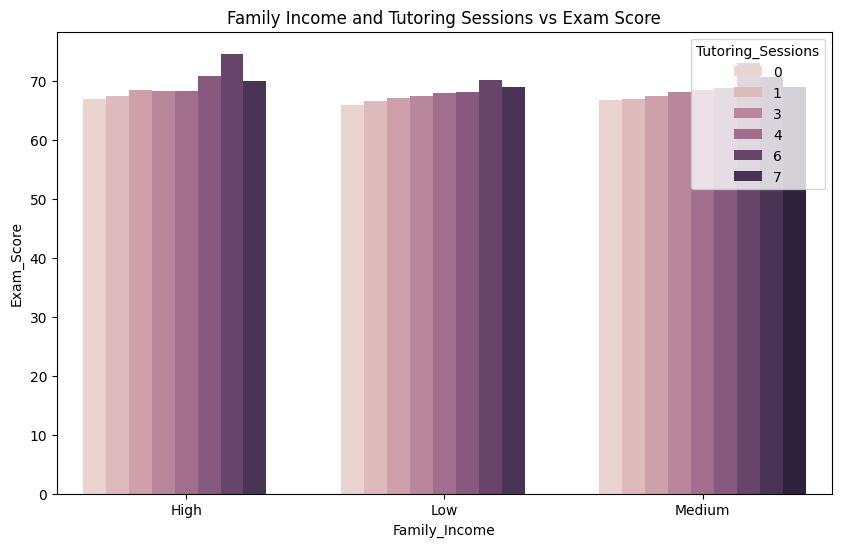

In [119]:
import seaborn as sns
import matplotlib.pyplot as plt
grouped = df_final.groupby(['Family_Income', 'Tutoring_Sessions'])['Exam_Score'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=grouped, x='Family_Income', y='Exam_Score', hue='Tutoring_Sessions')
plt.title('Family Income and Tutoring Sessions vs Exam Score')
plt.show()

# Graf pokaze da boljsi exam score imajo high family income studenti ki so imeli vecje stevilo tutorskih ur
# To nam lahko pomeni da so imeli boljse profesorje kjer so vec denarja placali.

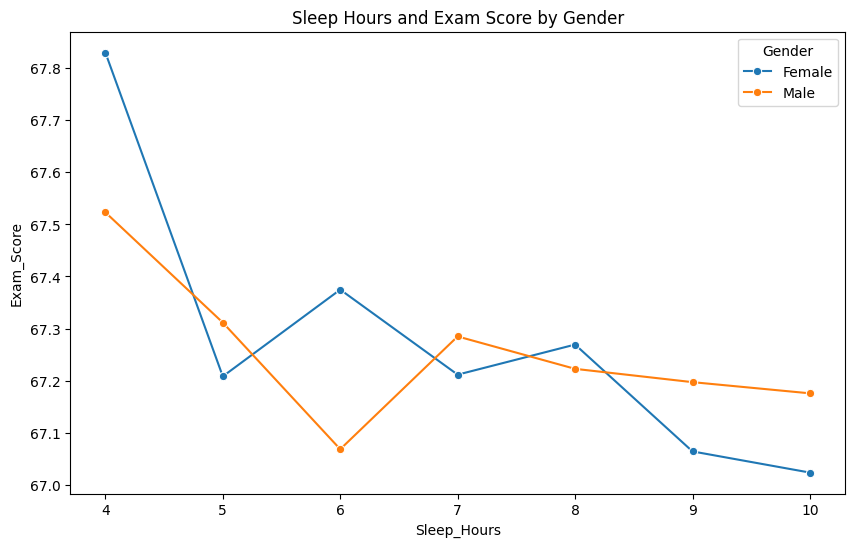

In [120]:
grouped = df_final.groupby(['Sleep_Hours', 'Gender'])['Exam_Score'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=grouped, x='Sleep_Hours', y='Exam_Score', hue='Gender', marker='o')
plt.title('Sleep Hours and Exam Score by Gender')
plt.show()

# Graf nam pokaze da so

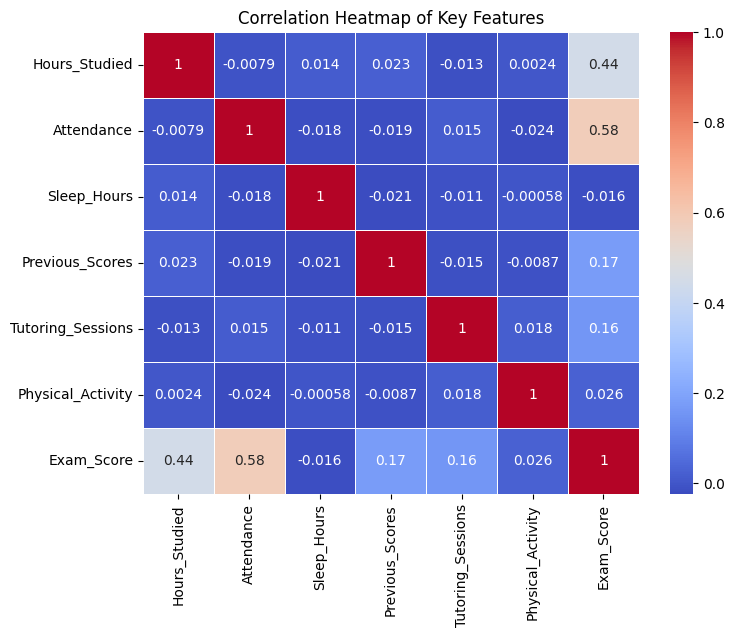

In [83]:
numerical_features = df_final.select_dtypes(include=['int64', 'float64']).columns
correlation = df_final[numerical_features].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Key Features')
plt.show()


<ipython-input-103-5ae2fefde7f0>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_final.groupby(['Learning_Disabilities', 'Score_Range']).size().unstack(fill_value=0)


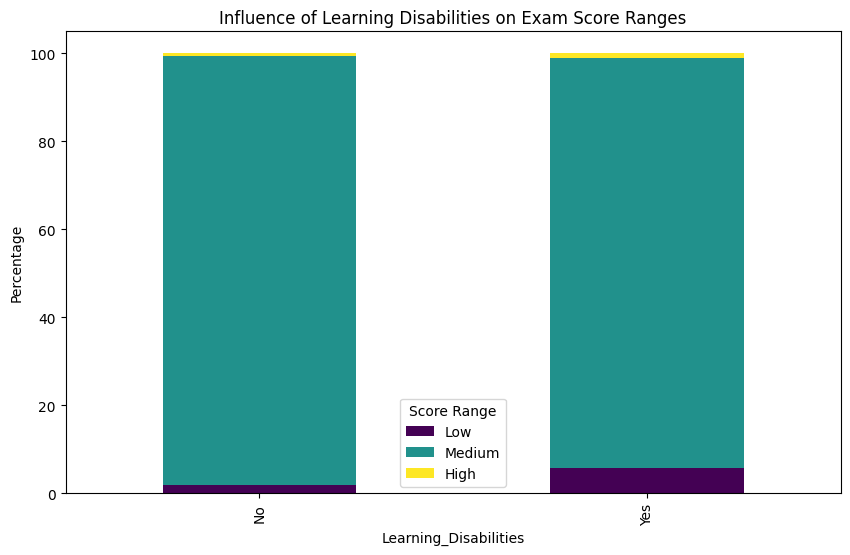

In [103]:
df_final['Score_Range'] = pd.cut(df_final['Exam_Score'], bins=[0, 60, 80, 100],
                                 labels=['Low', 'Medium', 'High'])

grouped = df_final.groupby(['Learning_Disabilities', 'Score_Range']).size().unstack(fill_value=0)
grouped_percentage = grouped.div(grouped.sum(axis=1), axis=0) * 100

grouped_percentage.plot(kind='bar', stacked=True, colormap='viridis', figsize=(10, 6))
plt.title('Influence of Learning Disabilities on Exam Score Ranges')
plt.ylabel('Percentage')
plt.legend(title='Score Range')
plt.show()


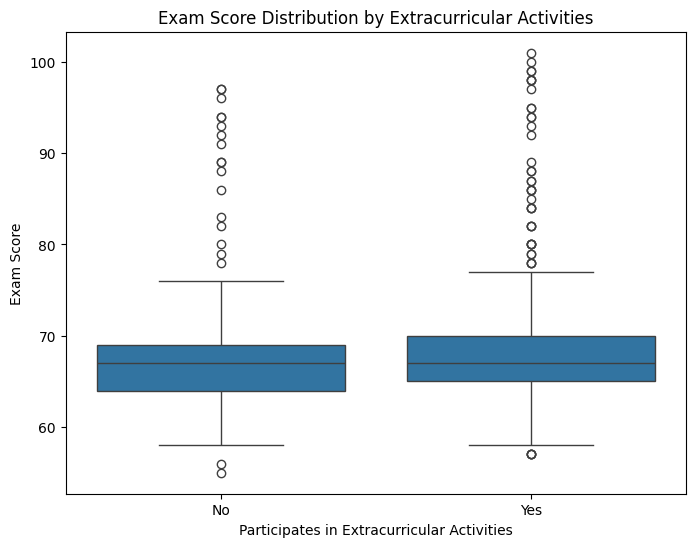

In [111]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Extracurricular_Activities', y='Exam_Score', data=df_final)
plt.title('Exam Score Distribution by Extracurricular Activities')
plt.xlabel('Participates in Extracurricular Activities')
plt.ylabel('Exam Score')
plt.show()


<ipython-input-105-63adae9d035c>:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = df_final.pivot_table(values='Exam_Score',


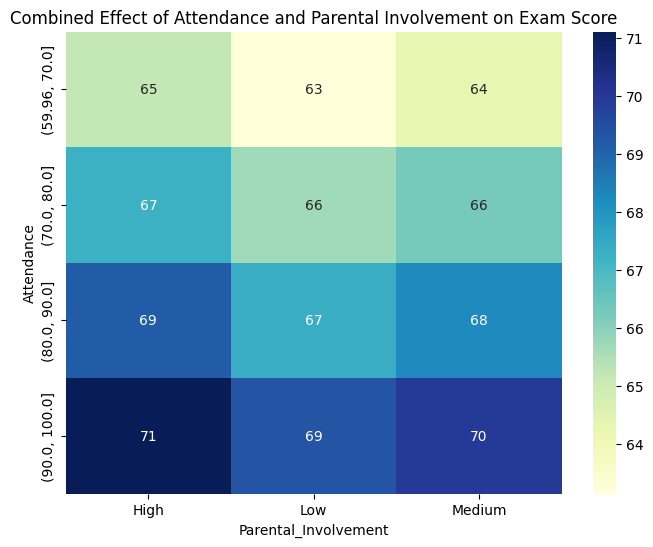

In [105]:
pivot = df_final.pivot_table(values='Exam_Score',
                             index=pd.cut(df_final['Attendance'], bins=4),
                             columns='Parental_Involvement',
                             aggfunc='mean')

plt.figure(figsize=(8, 6))
sns.heatmap(pivot, annot=True, cmap='YlGnBu')
plt.title('Combined Effect of Attendance and Parental Involvement on Exam Score')
plt.show()


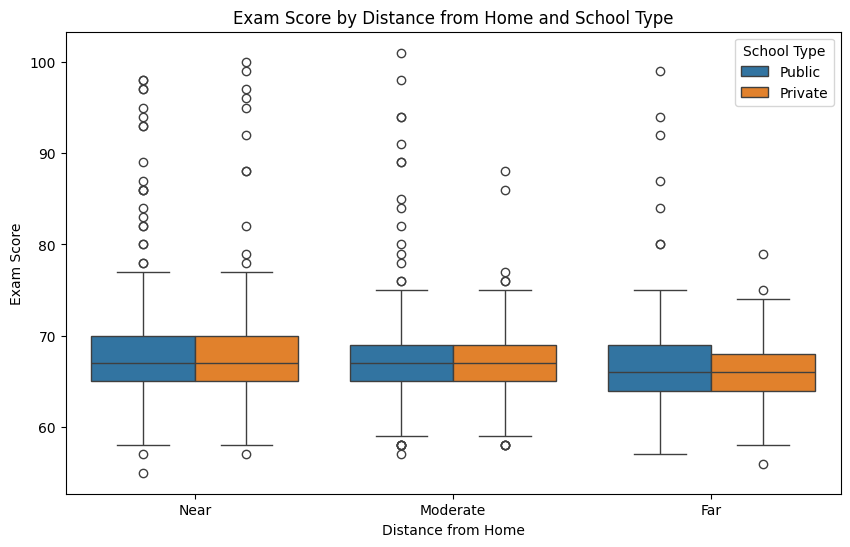

In [112]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Distance_from_Home', y='Exam_Score', hue='School_Type', data=df_final)
plt.title('Exam Score by Distance from Home and School Type')
plt.xlabel('Distance from Home')
plt.ylabel('Exam Score')
plt.legend(title='School Type')
plt.show()


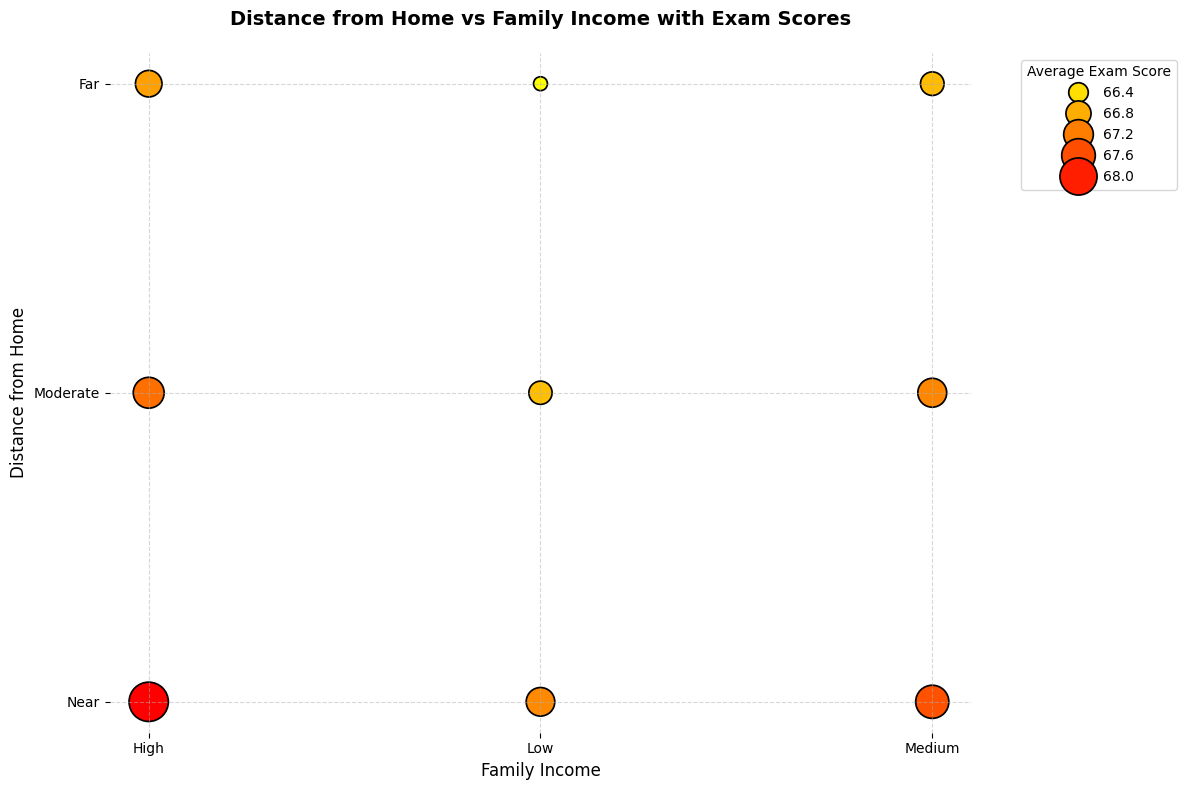

In [118]:
grouped = df_final.groupby(['Distance_from_Home', 'Family_Income'])['Exam_Score'].mean().reset_index()

plt.figure(figsize=(12, 8))
bubble_sizes = grouped['Exam_Score'] * 7

from matplotlib.colors import LinearSegmentedColormap
custom_cmap = LinearSegmentedColormap.from_list("custom_redyellow", ["yellow", "red"], N=100)

sns.scatterplot(x='Family_Income', y='Distance_from_Home', size='Exam_Score', sizes=(100, 800),
                hue='Exam_Score', data=grouped, palette=custom_cmap, legend="brief", edgecolor='black')

plt.title('Distance from Home vs Family Income with Exam Scores', fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Family Income', fontsize=12)
plt.ylabel('Distance from Home', fontsize=12)

legend = plt.legend(title='Average Exam Score', bbox_to_anchor=(1.05, 1), loc='upper left')
for text in legend.texts:
    text.set_fontsize(10)

plt.grid(True, linestyle='--', alpha=0.5)
sns.despine(left=True, bottom=True)  # Remove unnecessary spines
plt.tight_layout()

plt.show()

In [132]:
# Dropamo izhodni podatek
izhod_column_name = 'Exam_Score'
izhod_column = df_final[izhod_column_name]
df_final = df_final.drop(columns=izhod_column_name)

categorical_columns = df_final.select_dtypes(include=['object']).columns
numerical_columns = df_final.select_dtypes(include=['int64', 'float64']).columns

# Pretvaramo kategoricne podatke v stevilske
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for column in categorical_columns:
    df_final[column] = label_encoder.fit_transform(df_final[column])

# Standardiziramo numericne stevilke
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df_final[numerical_columns] = scaler.fit_transform(df_final[numerical_columns])

# Damo nazaj izhod column
df_final = pd.concat([df_final, izhod_column], axis=1)

df_final.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,0.506676,0.348560,1,0,0,-0.021533,-0.145108,1,1,-1.213157,1,2,1,2,0.029657,0,1,2,1,67
1,-0.161307,-1.383082,1,2,0,0.659685,-1.117448,1,1,0.409115,2,2,1,0,1.000879,0,0,1,0,61
2,0.673671,1.560710,2,2,1,-0.021533,1.105043,2,1,0.409115,2,2,1,1,1.000879,0,2,2,1,74
3,1.508650,0.781471,1,2,1,0.659685,1.591213,2,1,-0.402021,2,2,1,0,1.000879,0,1,1,1,71
4,-0.161307,1.041217,2,2,1,-0.702751,-0.700731,2,1,1.220252,2,0,1,1,1.000879,0,0,2,0,70


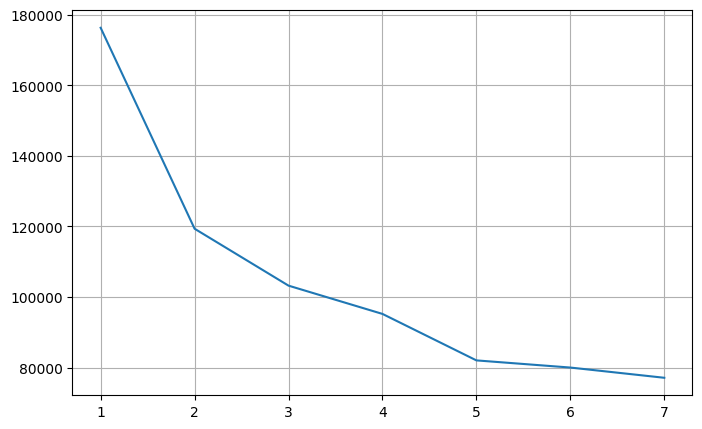

In [192]:
# Grucenje

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import FastICA

X_kmeans = df_final.copy()
X_hierarchical = df_final.copy()
X_dbscan = df_final.copy()

wcss = []
for k in range(1, 8):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_kmeans)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 8), wcss, linestyle='-')
plt.grid()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


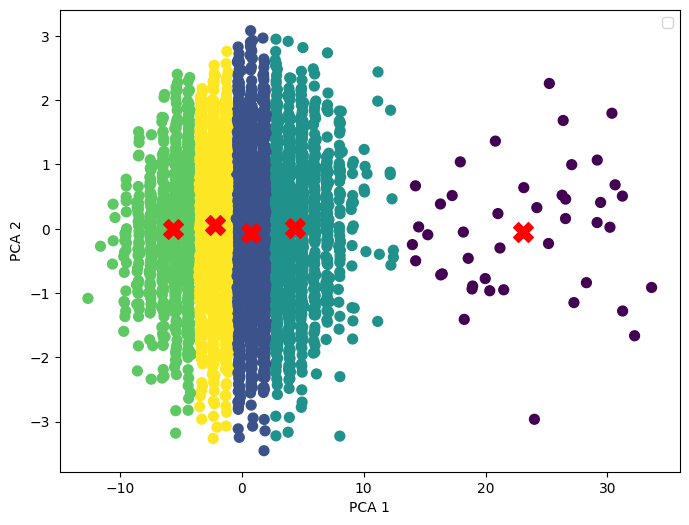

Silhouette Score: 0.124


In [184]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

kmeans = KMeans(n_clusters=5, random_state=42)
labels = kmeans.fit_predict(X_kmeans)

pca = PCA(n_components=2)
data_pca = pca.fit_transform(X_kmeans)

plt.figure(figsize=(8, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=labels, cmap='viridis', s=50)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")

centroids_pca = pca.transform(kmeans.cluster_centers_)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], s=200, c='red', marker='X')

plt.legend()
plt.show()

# Silhouette Score
silhouette = silhouette_score(X_kmeans, labels)
print(f"Silhouette Score: {silhouette:.3f}")

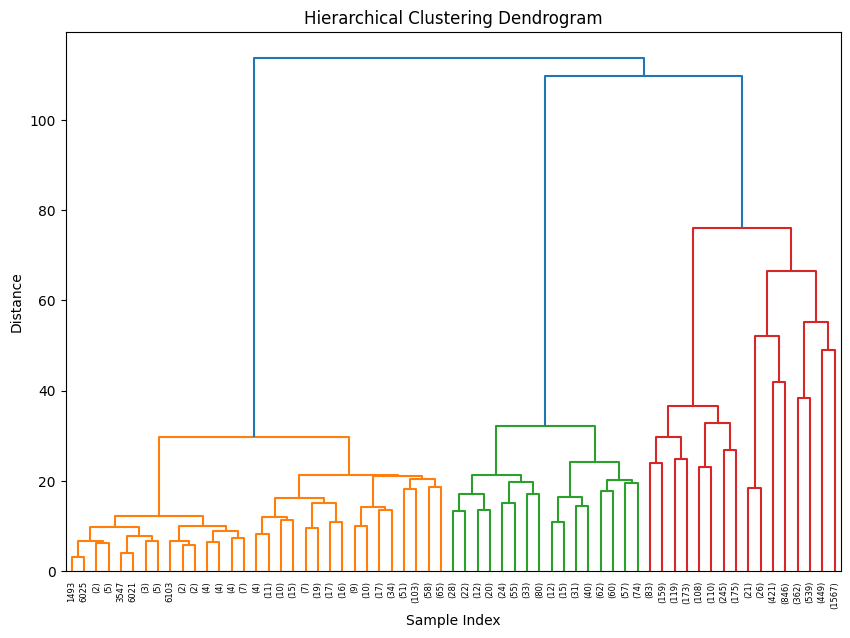

Silhouette Score: 0.015


In [175]:
scaler = StandardScaler()
X_hierarchical_scaled = scaler.fit_transform(X_hierarchical)

# Izračun povezav
linkage_matrix = linkage(X_hierarchical_scaled, method='ward')

# Risanje dendrograma
plt.figure(figsize=(10, 7))
dendrogram(
    linkage_matrix,
    truncate_mode='level',
    p=5,
)

plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

# Silhouette Score
silhouette = silhouette_score(X_hierarchical_scaled, labels)
print(f"Silhouette Score: {silhouette:.3f}")

Number of clusters found: 1
Silhouette Score not applicable - only one cluster or all points are noise.


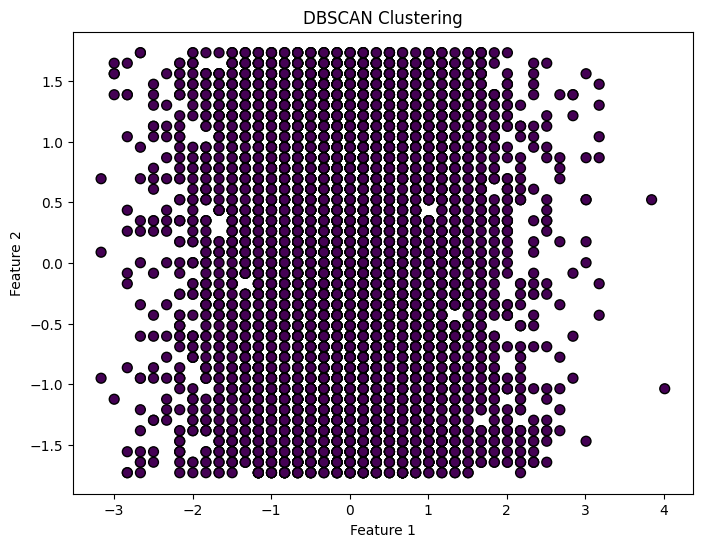

In [194]:
# Scaling the data
scaler = StandardScaler()
X_dbscan_scaled = scaler.fit_transform(X_dbscan)

# DBSCAN Clustering
dbscan = DBSCAN(eps=19, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_dbscan_scaled)

# Check unique clusters
n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
print(f"Number of clusters found: {n_clusters}")

# Silhouette Score - only calculate if at least 2 clusters exist
if n_clusters > 1:
    silhouette = silhouette_score(X_dbscan_scaled, dbscan_labels)
    print(f"Silhouette Score: {silhouette:.3f}")
else:
    print("Silhouette Score not applicable - only one cluster or all points are noise.")

# Plot DBSCAN results
plt.figure(figsize=(8, 6))
plt.scatter(X_dbscan_scaled[:, 0], X_dbscan_scaled[:, 1], c=dbscan_labels, cmap='viridis', s=50, edgecolors='k')
plt.title("DBSCAN Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()